# 2. Indicadores Técnicos

Este notebook calcula indicadores técnicos clásicos y algunos features derivados.

📈 Indicadores incluidos:
- SMA / EMA
- RSI
- Bandas de Bollinger
- ATR (Average True Range)
- Volatilidad (log-retornos)
- Momentum
- Distancia entre precio e indicadores


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from modules.technical_indicators import *
%matplotlib inline

In [2]:
btc_data = pd.read_csv('btc_data_clean.csv', index_col='date', parse_dates=True)

In [3]:
btc_data.head()

,open,high,low,close,Volume BTC,Volume USDT
date,,,,,,
2024-01-20,41672.0,41823.0,41493.0,41693.0,6.842462,2.852828e+05
2024-01-21,41722.0,41855.0,41536.0,41537.0,2.771034,1.151004e+05
2024-01-22,41564.0,41663.0,39449.0,39533.0,48.193464,1.905232e+06
2024-01-23,39554.0,40157.0,38533.0,39871.0,67.277449,2.682419e+06
2024-01-24,39934.0,40480.0,39490.0,40090.0,36.448158,1.461207e+06


# Indicadores clásicos

In [4]:
btc_data = add_sma(btc_data, 30)
btc_data = add_sma(btc_data, 70)
btc_data = add_ema(btc_data, 30)
btc_data['RSI'] = RSI(btc_data)
btc_data = add_bollinger_bands(btc_data, 20)

# Indicadores adicionales

In [5]:
btc_data = add_atr(btc_data, 14)
btc_data = add_log_return_volatility(btc_data, 14)
btc_data = add_momentum(btc_data, 10)

# Features derivados

In [6]:
btc_data = add_price_distance(btc_data, 'SMA_30')
btc_data = add_price_distance(btc_data, 'BOLL_UP_20')

#  Visualización

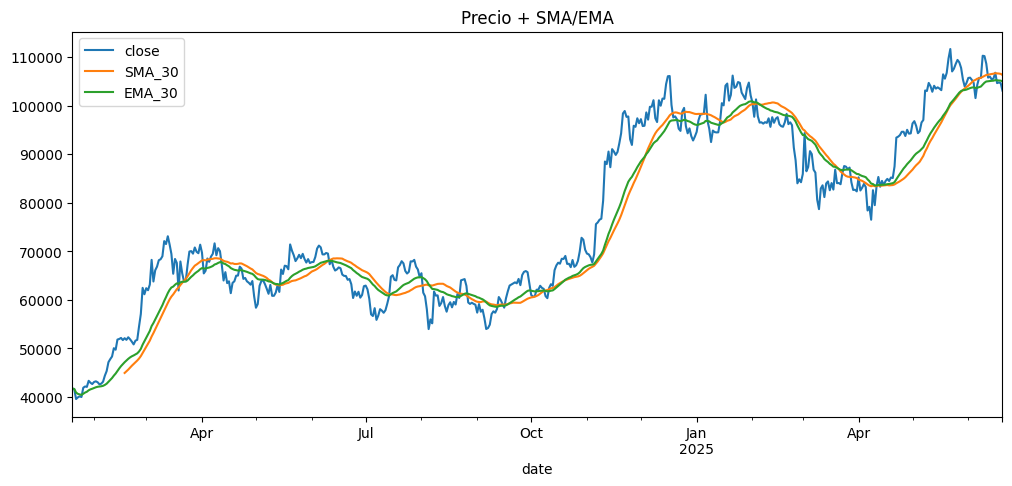

In [7]:
btc_data[['close', 'SMA_30', 'EMA_30']].plot(figsize=(12, 5), title='Precio + SMA/EMA');

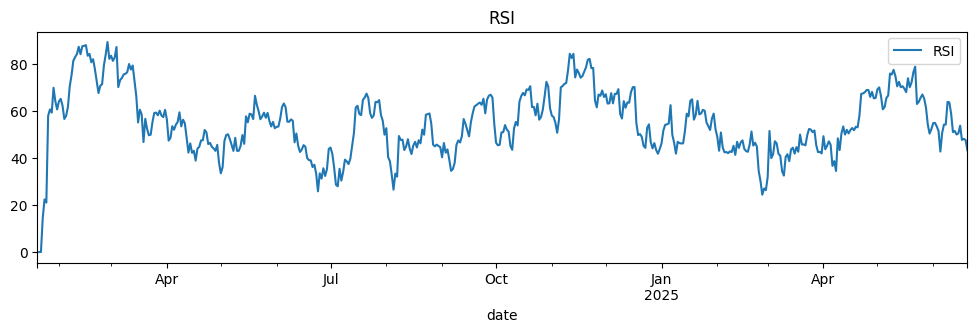

In [8]:
btc_data[['RSI']].plot(figsize=(12, 3), title='RSI');

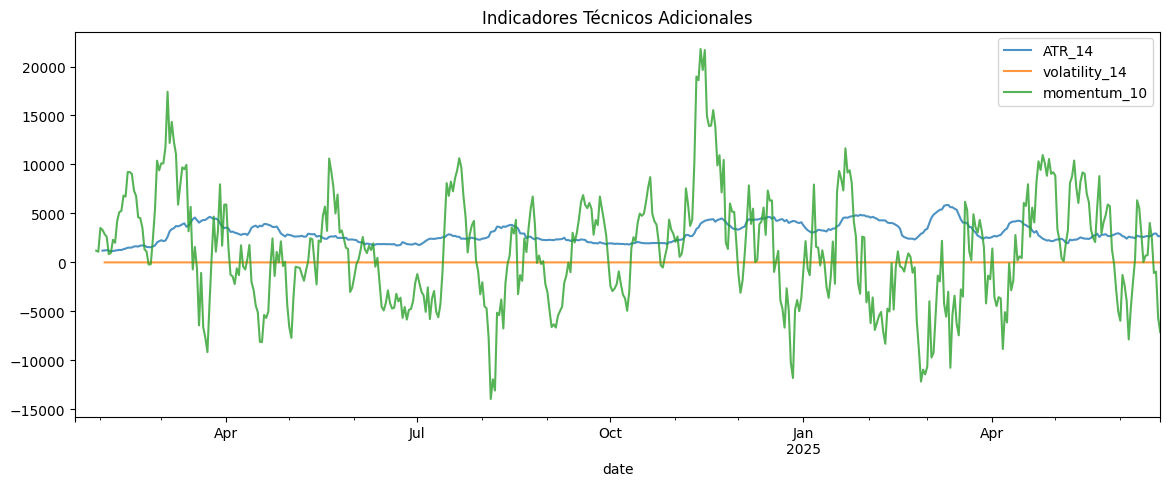

In [9]:
btc_data[['ATR_14', 'volatility_14', 'momentum_10']].plot(
    figsize=(14, 5),
    title='Indicadores Técnicos Adicionales',
    alpha=0.8);

In [10]:
btc_data.to_csv('btc_data_features.csv')